In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pickle

In [105]:
df = pd.read_csv("census_income.csv")

In [106]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [107]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values in the dataset.

In [108]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

## EDA

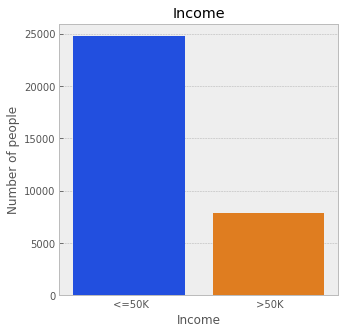

In [109]:

income = df['Income'].value_counts()

plt.figure(figsize=(5, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Income')
plt.xlabel('Income')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

The number of the people haivng income greater than 50k is almost three times lesser than the the people having income less than 50k. Target variable are imbalance. We have to balance the dataset.

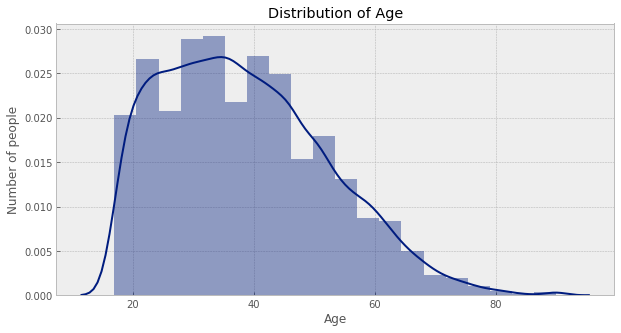

In [110]:
age = df['Age'].value_counts()

plt.figure(figsize=(10, 5))
sns.distplot(df['Age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

The data for the age is normally distributed but it is skewed.

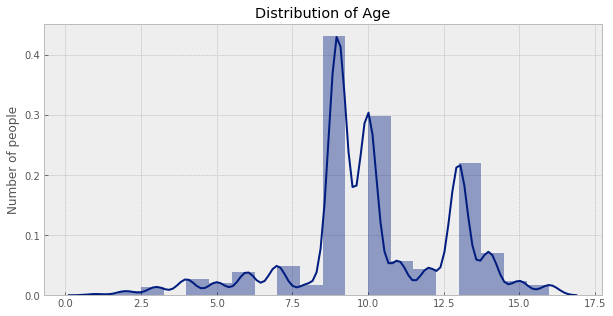

In [111]:
age = df['Education_num'].value_counts()

plt.figure(figsize=(10, 5))
sns.distplot(df['Education_num'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

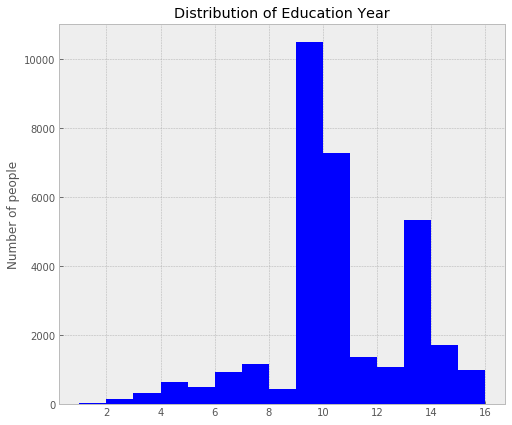

In [112]:
df["Education_num"].hist(color='b', alpha=1, bins=15)
#plt.xlabel()
plt.ylabel('Number of people')
plt.title('Distribution of Education Year')
plt.tick_params(labelsize=10)
plt.show()

The distribution looks like a normal distribution.

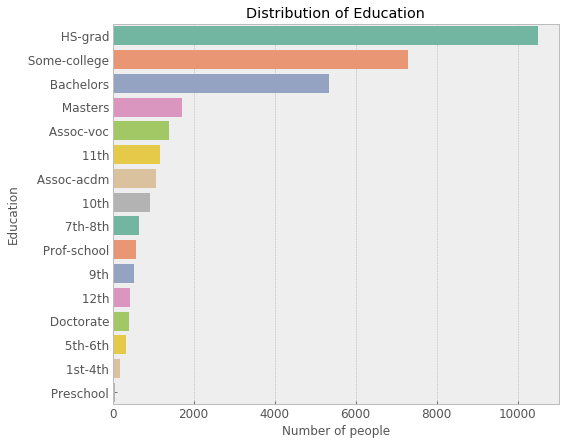

In [113]:
education = df['Education'].value_counts()
sns.barplot(education.values, education.index, palette='Set2')
plt.xlabel('Number of people')
plt.ylabel('Education')
plt.title('Distribution of Education')
plt.tick_params(labelsize=12)
plt.show()

Maximum people have education HS-grad.

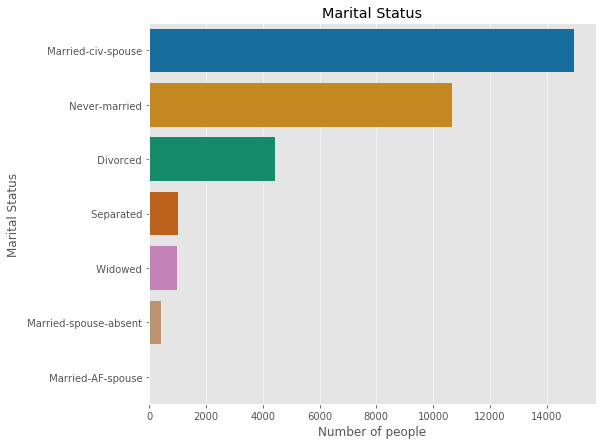

In [114]:
Marital_status = df['Marital_status'].value_counts()
plt.style.use('ggplot')
sns.barplot(Marital_status.values,Marital_status.index, palette='colorblind')
plt.title('Marital Status')
plt.xlabel('Number of people')
plt.ylabel('Marital Status')
plt.tick_params()
plt.show()

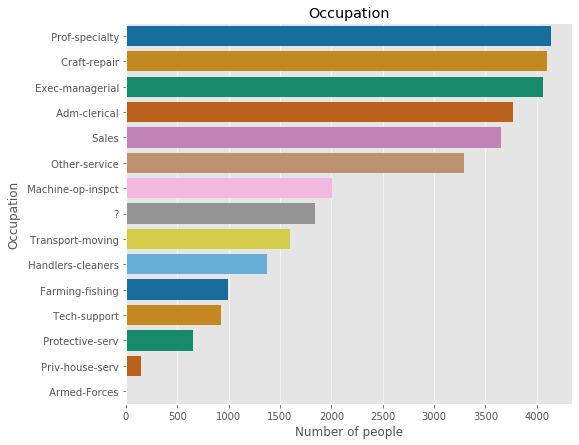

In [115]:
Occupation = df['Occupation'].value_counts()
plt.style.use('ggplot')
sns.barplot(Occupation.values, Occupation.index, palette='colorblind')
plt.title('Occupation')
plt.xlabel('Number of people')
plt.ylabel('Occupation')
plt.tick_params()
plt.show()

Occupation contain an unknown category"?". We will replace this to "Other".

In [116]:
df = df.replace('?', "other")

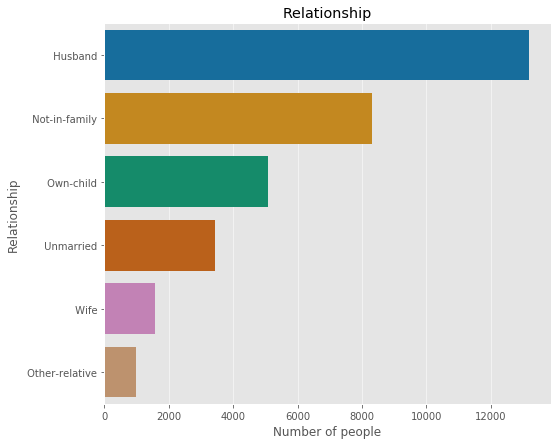

In [117]:
#Relationship  
Relationship = df['Relationship'].value_counts()
plt.style.use('ggplot')
sns.barplot(Relationship.values, Relationship.index, palette='colorblind')
plt.title('Relationship')
plt.xlabel('Number of people')
plt.ylabel('Relationship')
plt.tick_params()
plt.show()

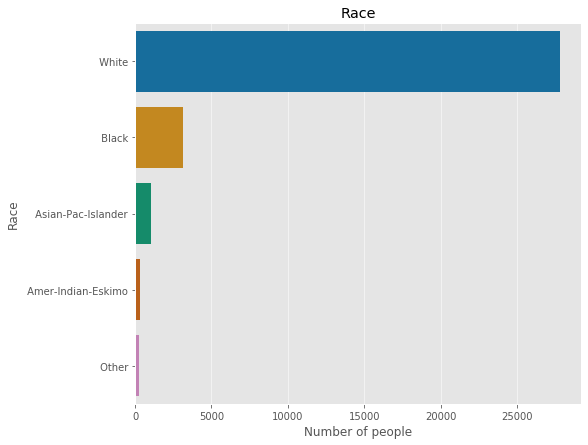

In [118]:
#Race              
Race = df['Race'].value_counts()
plt.style.use('ggplot')
sns.barplot(Race.values, Race.index, palette='colorblind')
plt.title('Race')
plt.xlabel('Number of people')
plt.ylabel('Race')
plt.tick_params()
plt.show()

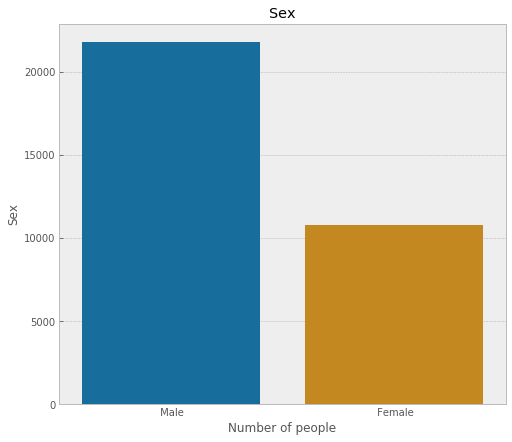

In [119]:
Sex = df['Sex'].value_counts()
plt.style.use('bmh')
sns.barplot(Sex.index, Sex.values, palette='colorblind')
plt.title('Sex')
plt.xlabel('Number of people')
plt.ylabel('Sex')
plt.tick_params()
plt.show()

The female candidates are almost half of the male candidates.

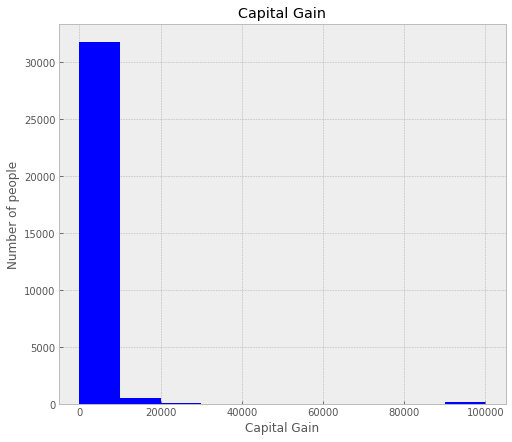

In [120]:
df["Capital_gain"].hist(color='b', alpha=1, bins=10)
#plt.xlabel()
plt.ylabel('Number of people')
plt.xlabel('Capital Gain')
plt.title('Capital Gain')
plt.tick_params(labelsize=10)
plt.show()

Most of the people have their income between 0 to 10000.

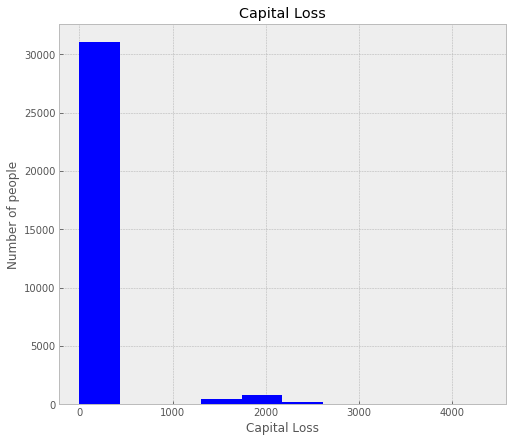

In [121]:
df["Capital_loss"].hist(color='b', alpha=1, bins=10)
#plt.xlabel()
plt.ylabel('Number of people')
plt.xlabel('Capital Loss')
plt.title('Capital Loss')
plt.tick_params(labelsize=10)
plt.show()

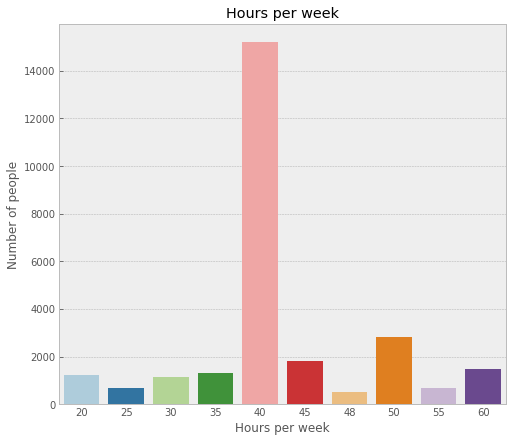

In [122]:
#Hours_per_week
#plt.xlabel()
HPW = df['Hours_per_week'].value_counts().head(10)
plt.style.use('bmh')
sns.barplot(HPW.index, HPW.values, palette='Paired')
plt.ylabel('Number of people')
plt.xlabel('Hours per week')
plt.title('Hours per week')
plt.tick_params(labelsize=10)
plt.show()

Most of the people have 40 hrs of work per week.

In [123]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [124]:
num_feat = list(df.describe().columns)
df[num_feat].corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


### checking the null values

In [125]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are no null values in the data.

### Handling categorical variables

In [126]:
from sklearn.preprocessing import LabelEncoder
columns = list(df.columns)
for columns in df.columns:
    if df[columns].dtypes == 'object':
        encoder = LabelEncoder()
        df[columns] = encoder.fit_transform(df[columns])

### Balancing the data

In [127]:
df.Income.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [128]:
24719-7841

16878

There are 16878 more data having income less than 50k. We have to balance the data so that algorithm can work better.

In [129]:
df1 = df[df["Income"]==1]
df2 = df[df["Income"]==0]

In [130]:
import secrets
ls = range(7841)

for i in range(16878):
    x = secrets.choice(ls)
    try:
        df1 = df1.append(df1.iloc[x])
    except:
        print (x)
df1.shape

(24719, 15)

In [131]:
dframes = [df1, df2]
df = pd.concat(dframes)

# shuffling the data
df = shuffle(df)
df.shape

(49438, 15)

Now the data frame has been balance and we can scale the data to feed it to the model.

### spliting the features and target

In [132]:
X = df.drop('Income', axis=1)
y = df['Income']

### Scaling the data

In [133]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

### splitting the test train data

In [134]:
from sklearn.model_selection import train_test_split

#import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Linear Regression

In [135]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42)
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

In [136]:
accuracy = round(accuracy_score(y_test, y_pred_LR),3)
accuracy

0.779

In [137]:
conf_m = confusion_matrix(y_test, y_pred_LR)
print(conf_m)

[[3882 1097]
 [1092 3817]]


The model is giving on 78% accuracy.

In [154]:
cols = ["Thresholds",'TP', 'FP', 'TN','FN']
lst = []
for i in np.arange(0,1.1,0.1):
    y_pred = np.where(LR.predict_proba(X_test)[:,1]>i,1,0)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    lst.append([round(i,1),tp,fp,tn,fn])
confusion_result_LR = pd.DataFrame(lst, columns=cols)

In [139]:
def calculate_metrics(results):
    roc = pd.DataFrame(index = results['Thresholds'], columns=['recall', 'precision', 'f1', 'tpr', 'fpr'])
    
    for i in results.iterrows():
        
        t, tp, fp,tn, fn = i[1]
        
        recall = tp / (tp + fn)
        
        if tp == fp == 0:
            precision = 0
            true_positive_rate = 0
        
        else:
            precision = tp / (tp + fp)
            true_positive_rate = tp / (tp + fn)
            
        if precision == recall == 0:
            f1 = 0
        else:
            f1 = 2 * (precision * recall) / (precision + recall)
        
        
        false_positive_rate = fp / (fp + tn)
        
        roc.ix[t, 'recall'] = recall
        roc.ix[t, 'precision'] = precision
        roc.ix[t, 'f1'] = f1
        roc.ix[t, 'tpr'] = true_positive_rate
        roc.ix[t, 'fpr'] = false_positive_rate
    
    return roc

In [160]:
roc_LR = calculate_metrics(confusion_result_LR)
roc_LR.reset_index()

C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated

,Thresholds,recall,precision,f1,tpr,fpr
0,0.0,1,0.49646,0.663513,1,1
1,0.1,0.992667,0.564201,0.719474,0.992667,0.755975
2,0.2,0.961092,0.627394,0.759192,0.961092,0.562764
3,0.3,0.924425,0.67924,0.783089,0.924425,0.430408
4,0.4,0.858423,0.729444,0.788695,0.858423,0.313918
5,0.5,0.777551,0.77676,0.777156,0.777551,0.220325
6,0.6,0.674475,0.819757,0.740054,0.674475,0.146214
7,0.7,0.550214,0.858824,0.670723,0.550214,0.0891745
8,0.8,0.413934,0.895944,0.566253,0.413934,0.0473991
9,0.9,0.25219,0.941445,0.397815,0.25219,0.015465


Populating the interactive namespace from numpy and matplotlib


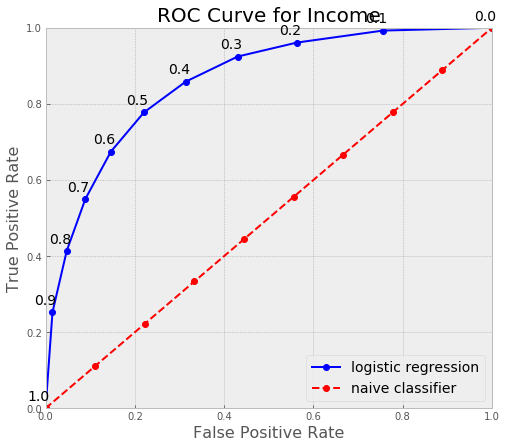

In [163]:
%pylab inline
figsize(8, 7)
plt.style.use('seaborn-dark-palette')
thresholds = [str(t) for t in confusion_result_LR['Thresholds']]
plt.plot(roc_LR['fpr'], roc_LR['tpr'], 'bo-', label = 'logistic regression');
plt.plot(list(np.linspace(0, 1, num = 10)), list(np.linspace(0, 1, num = 10)), 'ro--', label = 'naive classifier');
for x, y, s in zip(roc_LR['fpr'], roc_LR['tpr'], thresholds):
    plt.text(x - 0.04,y + 0.02, s, fontdict={'size': 14});

plt.legend(prop={'size':14})
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate', size = 16); plt.xlabel('False Positive Rate', size = 16);
plt.title('ROC Curve for Income', size = 20);

In [164]:
y_pred = np.where(LR.predict_proba(X_test)[:,1]>0.4,1,0)
pd.crosstab(y_test, y_pred)

col_0,0,1
Income,,
0,3416,1563
1,695,4214


In [143]:
y_pred = np.where(LR.predict_proba(X_test)[:,1]>0.4,1,0)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("TN:",tn,"FP:",fp,"FN:",fn,"TP:",tp)
recall = round(tp/(tp+fn),2)
print("True positive rate:",recall)
print("False positive rate:",round(fp/(fp+tn),2))
precision = round(tp/(tp+fp),2)
print("Precision:",precision)
print("f-measure:",round(2*recall*precision/(recall+precision),2))

TN: 3416 FP: 1563 FN: 695 TP: 4214
True positive rate: 0.86
False positive rate: 0.31
Precision: 0.73
f-measure: 0.79


## Decision tree

In [144]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)

In [145]:
accuracy = round(accuracy_score(y_test, y_pred_DT),3)
accuracy

0.918

DEcision tree is giving 92% accuracy whiich is much larger than the linear regression.

In [146]:
conf_m = confusion_matrix(y_test, y_pred_DT)
conf_m

array([[4304,  675],
       [ 133, 4776]], dtype=int64)

In [157]:
cols = ["Thresholds",'TP', 'FP', 'TN','FN']
lst = []
for i in np.arange(0,1.1,0.1):
    y_pred_DT = np.where(DT.predict_proba(X_test)[:,1]>i,1,0)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_DT).ravel()
    lst.append([round(i,1),tp,fp,tn,fn])
confusion_result_DT = pd.DataFrame(lst, columns=cols)

In [158]:
confusion_result_DT

,Thresholds,TP,FP,TN,FN
0,0.0,4776,675,4304,133
1,0.1,4776,675,4304,133
2,0.2,4776,675,4304,133
3,0.3,4776,675,4304,133
4,0.4,4776,675,4304,133
5,0.5,4776,675,4304,133
6,0.6,4776,675,4304,133
7,0.7,4776,675,4304,133
8,0.8,4776,675,4304,133
9,0.9,4776,675,4304,133


In [165]:
roc_DT = calculate_metrics(confusion_result)
roc_DT.reset_index()

C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated

,Thresholds,recall,precision,f1,tpr,fpr
0,0.0,0.972907,0.87617,0.922008,0.972907,0.135569
1,0.1,0.972907,0.87617,0.922008,0.972907,0.135569
2,0.2,0.972907,0.87617,0.922008,0.972907,0.135569
3,0.3,0.972907,0.87617,0.922008,0.972907,0.135569
4,0.4,0.972907,0.87617,0.922008,0.972907,0.135569
5,0.5,0.972907,0.87617,0.922008,0.972907,0.135569
6,0.6,0.972907,0.87617,0.922008,0.972907,0.135569
7,0.7,0.972907,0.87617,0.922008,0.972907,0.135569
8,0.8,0.972907,0.87617,0.922008,0.972907,0.135569
9,0.9,0.972907,0.87617,0.922008,0.972907,0.135569


Populating the interactive namespace from numpy and matplotlib


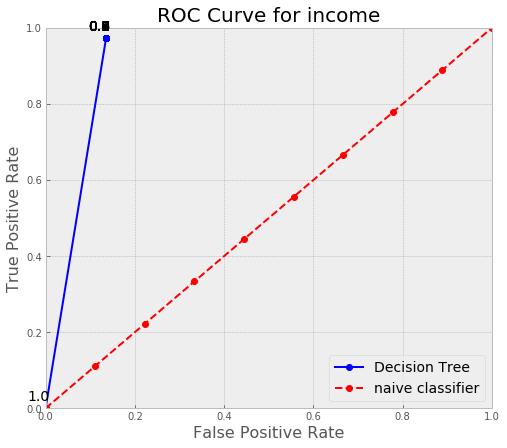

In [166]:
%pylab inline
figsize(8, 7)
plt.style.use('seaborn-dark-palette')
thresholds = [str(t) for t in confusion_result['Thresholds']]
plt.plot(roc_DT['fpr'], roc_DT['tpr'], 'bo-', label = 'Decision Tree');
plt.plot(list(np.linspace(0, 1, num = 10)), list(np.linspace(0, 1, num = 10)), 'ro--', label = 'naive classifier');
for x, y, s in zip(roc_DT['fpr'], roc_DT['tpr'], thresholds):
    plt.text(x - 0.04,y + 0.02, s, fontdict={'size': 14});

plt.legend(prop={'size':14})
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate', size = 16); plt.xlabel('False Positive Rate', size = 16);
plt.title('ROC Curve for income', size = 20);

## Random Forest

In [168]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred_RF),3)
accuracy

0.931

In [169]:
conf_m = confusion_matrix(y_test, y_pred_RF)
conf_m

array([[4407,  572],
       [ 108, 4801]], dtype=int64)

In [170]:
cols = ["Thresholds",'TP', 'FP', 'TN','FN']
lst = []
for i in np.arange(0,1.1,0.1):
    y_pred = np.where(RF.predict_proba(X_test)[:,1]>i,1,0)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    lst.append([round(i,1),tp,fp,tn,fn])
confusion_result_RF = pd.DataFrame(lst, columns=cols)

In [171]:
confusion_result_RF

,Thresholds,TP,FP,TN,FN
0,0.0,4909,3590,1389,0
1,0.1,4897,1976,3003,12
2,0.2,4870,1452,3527,39
3,0.3,4848,1073,3906,61
4,0.4,4830,824,4155,79
5,0.5,4801,572,4407,108
6,0.6,4768,393,4586,141
7,0.7,4619,241,4738,290
8,0.8,4362,124,4855,547
9,0.9,3871,58,4921,1038


In [172]:
roc_RF = calculate_metrics(confusion_result_RF)
roc_RF.reset_index()

C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated

,Thresholds,recall,precision,f1,tpr,fpr
0,0.0,1,0.577597,0.732249,1,0.721028
1,0.1,0.997556,0.712498,0.831268,0.997556,0.396867
2,0.2,0.992055,0.770326,0.867242,0.992055,0.291625
3,0.3,0.987574,0.818781,0.895291,0.987574,0.215505
4,0.4,0.983907,0.854262,0.914513,0.983907,0.165495
5,0.5,0.978,0.893542,0.933865,0.978,0.114883
6,0.6,0.971277,0.923852,0.946971,0.971277,0.0789315
7,0.7,0.940925,0.950412,0.945644,0.940925,0.0484033
8,0.8,0.888572,0.972358,0.928579,0.888572,0.0249046
9,0.9,0.788552,0.985238,0.87599,0.788552,0.0116489


Populating the interactive namespace from numpy and matplotlib


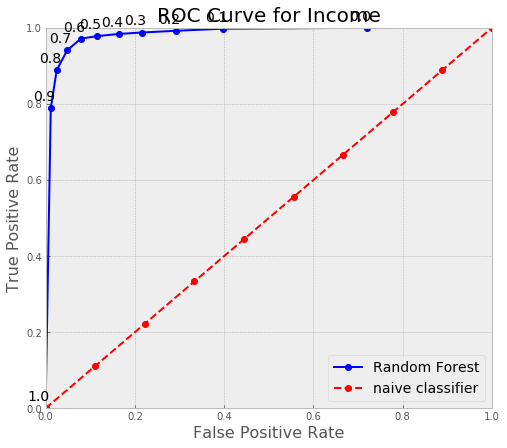

In [174]:
%pylab inline
figsize(8, 7)
plt.style.use('seaborn-dark-palette')
thresholds = [str(t) for t in confusion_result_RF['Thresholds']]
plt.plot(roc_RF['fpr'], roc_RF['tpr'], 'bo-', label = 'Random Forest');
plt.plot(list(np.linspace(0, 1, num = 10)), list(np.linspace(0, 1, num = 10)), 'ro--', label = 'naive classifier');
for x, y, s in zip(roc_RF['fpr'], roc_RF['tpr'], thresholds):
    plt.text(x - 0.04,y + 0.02, s, fontdict={'size': 14});

plt.legend(prop={'size':14})
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate', size = 16); plt.xlabel('False Positive Rate', size = 16);
plt.title('ROC Curve for Income', size = 20);

In [175]:
y_pred = np.where(RF.predict_proba(X_test)[:,1]>0.6,1,0)
pd.crosstab(y_test, y_pred)

col_0,0,1
Income,,
0,4586,393
1,141,4768


In [176]:
y_pred = np.where(RF.predict_proba(X_test)[:,1]>0.6,1,0)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("TN:",tn,"FP:",fp,"FN:",fn,"TP:",tp)
recall = round(tp/(tp+fn),2)
print("True positive rate:",recall)
print("False positive rate:",round(fp/(fp+tn),2))
precision = round(tp/(tp+fp),2)
print("Precision:",precision)
print("f-measure:",round(2*recall*precision/(recall+precision),2))

TN: 4586 FP: 393 FN: 141 TP: 4768
True positive rate: 0.97
False positive rate: 0.08
Precision: 0.92
f-measure: 0.94


The accuracy of the random forest is 93% and f-measure is 94 which is best till now.

## KNN

In [177]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred_KNN),3)
accuracy

0.835

In [179]:
conf_m = confusion_matrix(y_test, y_pred_KNN)
conf_m

array([[3869, 1110],
       [ 524, 4385]], dtype=int64)

In [180]:
cols = ["Thresholds",'TP', 'FP', 'TN','FN']
lst = []
for i in np.arange(0,1.1,0.1):
    y_pred = np.where(KNN.predict_proba(X_test)[:,1]>i,1,0)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    lst.append([round(i,1),tp,fp,tn,fn])
confusion_result_KNN = pd.DataFrame(lst, columns=cols)

In [181]:
roc_KNN = calculate_metrics(confusion_result_KNN)
roc_KNN.reset_index()

C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Surjeet\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated

,Thresholds,recall,precision,f1,tpr,fpr
0,0.0,0.994092,0.724251,0.837984,0.994092,0.373167
1,0.1,0.994092,0.724251,0.837984,0.994092,0.373167
2,0.2,0.964555,0.753741,0.846216,0.964555,0.310705
3,0.3,0.964555,0.753741,0.846216,0.964555,0.310705
4,0.4,0.893257,0.797998,0.842945,0.893257,0.222936
5,0.5,0.893257,0.797998,0.842945,0.893257,0.222936
6,0.6,0.768588,0.842564,0.803878,0.768588,0.141595
7,0.7,0.768588,0.842564,0.803878,0.768588,0.141595
8,0.8,0.546343,0.895792,0.67873,0.546343,0.0626632
9,0.9,0.546343,0.895792,0.67873,0.546343,0.0626632


Populating the interactive namespace from numpy and matplotlib


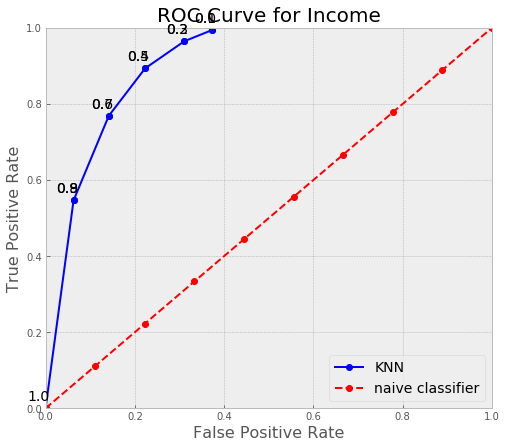

In [183]:
%pylab inline
figsize(8, 7)
plt.style.use('seaborn-dark-palette')
thresholds = [str(t) for t in confusion_result_KNN['Thresholds']]
plt.plot(roc_KNN['fpr'], roc_KNN['tpr'], 'bo-', label = 'KNN');
plt.plot(list(np.linspace(0, 1, num = 10)), list(np.linspace(0, 1, num = 10)), 'ro--', label = 'naive classifier');
for x, y, s in zip(roc_KNN['fpr'], roc_KNN['tpr'], thresholds):
    plt.text(x - 0.04,y + 0.02, s, fontdict={'size': 14});

plt.legend(prop={'size':14})
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate', size = 16); plt.xlabel('False Positive Rate', size = 16);
plt.title('ROC Curve for Income', size = 20);

Maximum f-measure of the KNN is 0.84 which is much less than the random forest.

## Conclusion

The best model comes out to be the random forest with accuracy 93% and f-measure 0.94. We will save this model as pickle file.

In [185]:
pickle.dump(RF, open('model.pkl','wb'))